In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC

from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle

In [2]:
listings_df =pd.read_csv('~/Downloads/2018 DA Take Home Challenge/listings.csv')
contacts_df =pd.read_csv('~/Downloads/2018 DA Take Home Challenge/contacts.csv')
users_df = pd.read_csv('~/Downloads/2018 DA Take Home Challenge/users.csv')

In [3]:
listings_df

,id_listing_anon,room_type,listing_neighborhood,total_reviews
0,71582793-e5f8-46d7-afdf-7a31d2341c79,Private room,-unknown-,0.0
1,a1a3f728-e21f-4432-96aa-361d28e2b319,Entire home/apt,Copacabana,0.0
2,353a68be-ecf9-4b7b-9533-c882dc2f0760,Entire home/apt,Barra da Tijuca,3.0
3,b9ae1908-0486-40ac-bbcf-bd63ffebfe63,Entire home/apt,Lapa,4.0
4,fa0290ef-7881-4482-8981-8ebb1ce5dbfd,Entire home/apt,-unknown-,0.0
...,...,...,...,...
13033,3e1d677a-c953-4c97-96f0-78011d52c468,Entire home/apt,Copacabana,129.0
13034,78f65154-4217-4985-ab65-a5935a8c195f,Entire home/apt,Copacabana,0.0
13035,31f9f27a-077d-47c6-90f9-324ec9d76d35,Entire home/apt,Lagoa,0.0
13036,8cd6b783-e305-4988-a3bd-da1c2523d364,Entire home/apt,Copacabana,0.0


In [4]:
contacts_df.head(5)

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,NaN,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,NaN,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52,2016-05-05 15:17:40.0,2016-05-05 15:17:40.0,NaN,2016-05-27,2016-05-29,2.0,3,203.0,contact_me,new
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25.0,2016-06-23 03:09:26.0,2016-06-23 03:09:33.0,2016-06-23 03:09:33.0,2016-08-19,2016-08-21,3.0,25,0.0,instant_book,past_booker


In [5]:
users_df

,id_user_anon,country,words_in_user_profile
0,1d16a001-31a2-494c-a101-1f7b308adc62,FR,0
1,42607e0a-86c0-472e-b633-9e192114e93c,AR,0
2,25f85eb5-a700-44e1-b142-4c076222198d,BR,0
3,55abeba0-18ef-4c58-80f4-3c278b706aca,BR,1
4,5d62d35a-7d6d-45dd-ae9b-a5d2f82a7d7b,BR,98
...,...,...,...
31520,e60ee532-f55c-474c-8fb7-1ff16b3b6023,BR,100
31521,33187bc0-2544-4937-84f1-56a808057c36,BR,121
31522,f371e503-9ebf-4ba9-a6a9-2f7c11279c73,BR,11
31523,66120016-6a90-42b8-8d14-acee4dbe3db4,BR,1


In [6]:
contact_channel_df =contacts_df.groupby('contact_channel_first')

In [7]:
contact_channel_df.contact_channel_first.value_counts()

contact_channel_first  contact_channel_first
book_it                book_it                   8366
contact_me             contact_me               12828
instant_book           instant_book              6693
Name: contact_channel_first, dtype: int64

In [8]:
contact_channel_df.describe()

m_guests                                                \
                         count      mean       std  min  25%  50%  75%   max   
contact_channel_first                                                          
book_it                 8366.0  2.631006  1.673389  1.0  2.0  2.0  3.0  13.0   
contact_me             12827.0  3.050752  2.109803  0.0  2.0  2.0  4.0  16.0   
instant_book            6693.0  2.455849  1.473019  0.0  2.0  2.0  3.0  16.0   

                      m_interactions             ...               \
                               count       mean  ...   75%    max   
contact_channel_first                            ...                
book_it                       8366.0   8.849390  ...  11.0  410.0   
contact_me                   12828.0   6.104693  ...   6.0  130.0   
instant_book                  6693.0  11.636785  ...  15.0  258.0   

                      m_first_message_length_in_characters              \
                                                     count        mean   
contact_channel_first                                                    
book_it                                             8366.0  165.762730   
contact_me                                         12828.0  230.354381   
instant_book                                        6693.0  158.420290   

                                                                     
                              std  min    25%    50%    75%     max  
contact_channel_first                                                
book_it                179.294094  0.0    7.0  125.0  248.0  1770.0  
contact_me             185.135149  0.0  107.0  183.0  301.0  1948.0  
instant_book           170.696477  0.0   17.0  122.0  231.0  2341.0  

[3 rows x 24 columns]

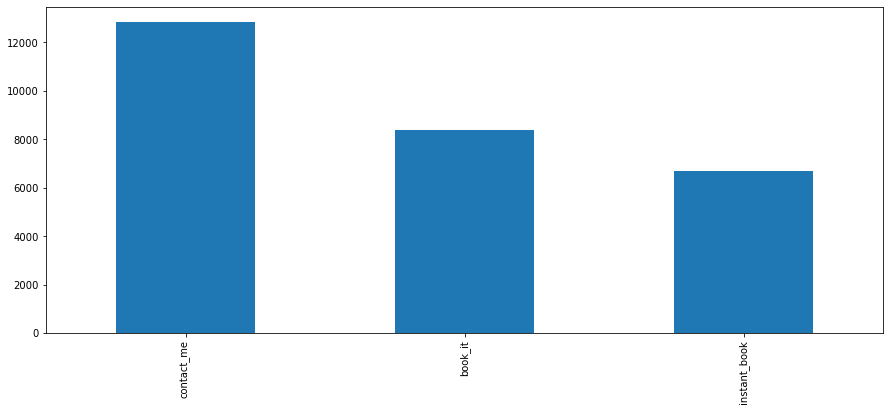

In [9]:
plt.figure(figsize=(15,6))
contacts_df.contact_channel_first.value_counts().plot(kind='bar')
plt.show()

In [10]:
contacts_df


,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,NaN,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,NaN,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52,2016-05-05 15:17:40.0,2016-05-05 15:17:40.0,NaN,2016-05-27,2016-05-29,2.0,3,203.0,contact_me,new
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25.0,2016-06-23 03:09:26.0,2016-06-23 03:09:33.0,2016-06-23 03:09:33.0,2016-08-19,2016-08-21,3.0,25,0.0,instant_book,past_booker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27882,b4fea538-8266-4b19-b211-5d93c3e6d05b,b328e13e-b11c-4a63-a137-daa527958c49,78e86cac-d1d5-46ef-889f-d3f19b068afb,2016-01-21 00:14:24,2016-01-21 00:42:53.0,NaN,NaN,2016-01-22,2016-01-31,1.0,4,447.0,contact_me,past_booker
27883,0894f35e-442a-40f5-b908-b07016e6d6ff,d54423d3-776e-4978-b6c0-7cf59c76ec3c,2e00192a-786d-4202-bd07-80f2e69b00cd,2016-04-11 18:21:26.0,2016-04-11 18:21:26.0,2016-04-11 18:21:26.0,2016-04-11 18:21:26.0,2016-06-08,2016-06-11,2.0,21,0.0,instant_book,past_booker
27884,d75edd43-0810-4b35-8b1e-5ab8271d48a9,63124840-6516-459c-95ed-108f0d5cef41,9992dc76-c770-4db9-86a2-a4edbd1147f3,2016-02-24 12:19:31,2016-02-24 12:19:39.0,2016-03-02 01:51:02.0,NaN,2016-08-18,2016-08-22,2.0,5,74.0,contact_me,new
27885,a997e85d-52cc-4bcc-97b3-e4c70e29721b,efa7ea8b-e78c-48d1-abfd-1dfc06c48e61,bc7545c3-8491-44ab-be64-f73d92b944ac,2016-02-08 08:13:08.0,2016-02-08 08:13:08.0,2016-02-08 08:13:08.0,2016-02-08 08:13:08.0,2016-03-06,2016-03-08,1.0,20,163.0,instant_book,past_booker


In [11]:
contacts_df['ts_booking_at'].isnull().sum()

16300

In [12]:
contacts_df

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,NaN,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,NaN,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52,2016-05-05 15:17:40.0,2016-05-05 15:17:40.0,NaN,2016-05-27,2016-05-29,2.0,3,203.0,contact_me,new
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25.0,2016-06-23 03:09:26.0,2016-06-23 03:09:33.0,2016-06-23 03:09:33.0,2016-08-19,2016-08-21,3.0,25,0.0,instant_book,past_booker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27882,b4fea538-8266-4b19-b211-5d93c3e6d05b,b328e13e-b11c-4a63-a137-daa527958c49,78e86cac-d1d5-46ef-889f-d3f19b068afb,2016-01-21 00:14:24,2016-01-21 00:42:53.0,NaN,NaN,2016-01-22,2016-01-31,1.0,4,447.0,contact_me,past_booker
27883,0894f35e-442a-40f5-b908-b07016e6d6ff,d54423d3-776e-4978-b6c0-7cf59c76ec3c,2e00192a-786d-4202-bd07-80f2e69b00cd,2016-04-11 18:21:26.0,2016-04-11 18:21:26.0,2016-04-11 18:21:26.0,2016-04-11 18:21:26.0,2016-06-08,2016-06-11,2.0,21,0.0,instant_book,past_booker
27884,d75edd43-0810-4b35-8b1e-5ab8271d48a9,63124840-6516-459c-95ed-108f0d5cef41,9992dc76-c770-4db9-86a2-a4edbd1147f3,2016-02-24 12:19:31,2016-02-24 12:19:39.0,2016-03-02 01:51:02.0,NaN,2016-08-18,2016-08-22,2.0,5,74.0,contact_me,new
27885,a997e85d-52cc-4bcc-97b3-e4c70e29721b,efa7ea8b-e78c-48d1-abfd-1dfc06c48e61,bc7545c3-8491-44ab-be64-f73d92b944ac,2016-02-08 08:13:08.0,2016-02-08 08:13:08.0,2016-02-08 08:13:08.0,2016-02-08 08:13:08.0,2016-03-06,2016-03-08,1.0,20,163.0,instant_book,past_booker


In [13]:
contacts_df.groupby('contact_channel_first')

In [14]:
contacts_df2 = contacts_df.copy()

In [15]:
contacts_df.contact_channel_first.value_counts()

contact_me      12828
book_it          8366
instant_book     6693
Name: contact_channel_first, dtype: int64

In [16]:
contacts_df['contact_channel_first'].isnull().sum()

0

In [17]:
contact_me_df= contacts_df[contacts_df['contact_channel_first']=='contact_me']
instant_book_df= contacts_df[contacts_df['contact_channel_first']=='instant_book']
book_it_df= contacts_df[contacts_df['contact_channel_first']=='book_it']

In [18]:
book_it_df

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker
9,177cddfa-fe47-4668-81bf-884490a6707b,2bd81140-3d71-4fd9-add3-5998f9263c57,cff02e60-1205-42fa-afd4-0c23029ce32e,2016-04-26 02:11:47,2016-04-26 02:16:39.0,NaN,NaN,2016-08-12,2016-08-17,4.0,6,128.0,book_it,new
11,b88f0944-8278-49c1-928c-eac65ca3a8d2,bf6e95ec-966d-46af-9bfe-f2dd91523571,1f51882a-4abd-4bd4-be6d-a75ae8be4986,2016-06-03 22:40:22,2016-06-06 21:27:00.0,NaN,NaN,2016-08-14,2016-08-19,4.0,6,280.0,book_it,new
12,a2c8d522-41df-4b49-9aaf-6c4b3d95afed,3d046d4c-b456-4fdc-b1db-9ee1a7a441a9,96169363-f4e6-4a15-8a2f-90d93c6ae469,2016-02-20 03:51:52,2016-02-20 09:57:20.0,2016-02-20 09:57:20.0,2016-02-20 09:57:20.0,2016-02-20,2016-02-21,2.0,2,176.0,book_it,past_booker
13,c463ff6c-c2bf-474a-86c3-7fc979e08020,a66f8d54-84ac-4220-9296-a5037370a5b6,64930c5b-232a-4c93-af86-fe8e8dfc276c,2016-02-28 18:03:02,2016-02-28 18:21:39.0,2016-02-28 18:21:39.0,2016-02-28 18:21:39.0,2016-03-23,2016-03-27,2.0,8,290.0,book_it,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,4d881d19-1021-46e2-a9af-3358098d8933,847fb358-14d5-4e1e-9b9e-6713b01e5acd,3fb32e19-1e30-452d-b16f-d974cb193cb6,2016-05-03 17:55:21,2016-05-03 18:26:26.0,NaN,NaN,2016-05-13,2016-05-15,2.0,7,0.0,book_it,past_booker
27870,b60a690a-35d8-4c97-981b-6610c6cf177e,c7d9e01a-a61b-4971-b8df-16acabe6f2bc,0b749a5a-dce0-4945-9caa-a141fcd32807,2016-06-07 19:41:24,2016-06-07 22:08:37.0,2016-06-08 17:35:06.0,2016-06-08 17:35:06.0,2016-08-04,2016-08-12,1.0,13,78.0,book_it,new
27872,8604d9f2-6f55-4b47-b1c8-a532d938cada,b3838d98-1377-482c-a0d7-576fd0f9b407,c7752176-252c-4b4c-8eb9-36282e885cc5,2016-05-04 20:33:52,2016-05-04 20:45:40.0,NaN,NaN,2016-08-03,2016-08-22,1.0,4,229.0,book_it,past_booker
27876,e18f00b5-b6a7-48fb-885e-0d6ecf681bb5,05f2fd8e-1227-457e-8b4b-9572f13fbaf8,f184b537-2116-41af-8497-b66f34c84ce4,2016-01-17 23:29:34,NaN,NaN,NaN,2016-08-05,2016-08-09,5.0,1,0.0,book_it,past_booker


In [19]:
book_it_df.ts_booking_at.isnull().sum()

4383

## percentage of "Book it" type interactions that result in non-booking

In [20]:
avg1 = 4383/8366
avg1

0.523906287353574

In [21]:
contact_me_df.shape

(12828, 14)

In [22]:
contact_me_df.ts_booking_at.isnull().sum()

11917

In [23]:
avg2 =11917/12828
avg2

0.9289834736513876

In [24]:
instant_book_df.shape

(6693, 14)

In [25]:
instant_book_df.ts_booking_at.isnull().sum()

0

In [102]:
# avg3 = 4383/8366
# avg3
instant_book_df.shape

(6693, 14)

In [27]:
instant_book_df

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25.0,2016-06-23 03:09:26.0,2016-06-23 03:09:33.0,2016-06-23 03:09:33.0,2016-08-19,2016-08-21,3.0,25,0.0,instant_book,past_booker
7,b3357bab-cf20-4646-b723-23ae84fc8fb3,7e0696cb-6321-4d60-a8e9-793ee14724fd,75de5296-f7df-45d2-9c18-af332a082784,2016-03-10 12:13:46.0,2016-03-10 12:13:47.0,2016-03-10 12:13:47.0,2016-03-10 12:13:47.0,2017-02-23,2017-03-02,1.0,8,782.0,instant_book,new
8,e52ccc38-1ca1-48b4-a10a-08663601dbbb,1c990fca-5b09-4eca-bdcf-d9e923112f04,f6822854-6d3c-4cfd-a983-49603a401771,2016-04-24 06:46:42.0,2016-04-24 06:46:42.0,2016-04-24 06:46:42.0,2016-04-24 06:46:42.0,2016-05-16,2016-05-18,1.0,6,0.0,instant_book,past_booker
19,b577b943-e463-4c5d-b762-c28b8cf2165f,e086d187-8e1e-4810-9f74-d3204043601c,eb4799d5-aa04-4402-9bec-9625f6700e4e,2016-05-19 12:27:11.0,2016-05-19 12:27:11.0,2016-05-19 12:27:11.0,2016-05-19 12:27:11.0,2016-07-06,2016-07-15,2.0,21,550.0,instant_book,past_booker
21,39a03eb0-2988-4e2e-bf2f-6b40573be5e4,784b3a23-95d1-4e8a-9c88-bd57030ddf23,36207376-648c-41db-9ecf-a176e761f922,2016-01-04 13:28:55.0,2016-01-04 14:42:27.0,2016-01-04 14:42:27.0,2016-01-04 14:42:27.0,2016-01-05,2016-01-07,1.0,7,41.0,instant_book,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27875,e4e95a07-92aa-427b-a3b3-e6d0df1df2e6,0529b9f2-706c-4a18-ac25-e91707bfca0c,cc5d5ce0-b906-4238-b6b3-6e173f00154a,2016-02-15 19:40:55.0,2016-02-15 19:40:55.0,2016-02-15 19:40:55.0,2016-02-15 19:40:55.0,2016-08-07,2016-08-17,2.0,9,518.0,instant_book,new
27878,ecbfda5e-bb17-45e4-b058-8eaad75e15c9,cd613721-1b67-4629-bfc8-4bffc2597f4f,d55a5967-2f00-434e-a649-212ee7c09031,2016-05-09 12:08:25.0,2016-05-09 12:08:26.0,2016-05-09 12:08:26.0,2016-05-09 12:08:26.0,2016-05-20,2016-05-23,2.0,3,137.0,instant_book,new
27883,0894f35e-442a-40f5-b908-b07016e6d6ff,d54423d3-776e-4978-b6c0-7cf59c76ec3c,2e00192a-786d-4202-bd07-80f2e69b00cd,2016-04-11 18:21:26.0,2016-04-11 18:21:26.0,2016-04-11 18:21:26.0,2016-04-11 18:21:26.0,2016-06-08,2016-06-11,2.0,21,0.0,instant_book,past_booker
27885,a997e85d-52cc-4bcc-97b3-e4c70e29721b,efa7ea8b-e78c-48d1-abfd-1dfc06c48e61,bc7545c3-8491-44ab-be64-f73d92b944ac,2016-02-08 08:13:08.0,2016-02-08 08:13:08.0,2016-02-08 08:13:08.0,2016-02-08 08:13:08.0,2016-03-06,2016-03-08,1.0,20,163.0,instant_book,past_booker


In [28]:
listings_df =pd.read_csv('~/Downloads/2018 DA Take Home Challenge/listings.csv')
contacts_df =pd.read_csv('~/Downloads/2018 DA Take Home Challenge/contacts.csv')
users_df = pd.read_csv('~/Downloads/2018 DA Take Home Challenge/users.csv')

In [29]:
combined_df =contacts_df.merge(listings_df, left_on ='id_listing_anon', right_on='id_listing_anon')

In [30]:
combined_df.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker,Entire home/apt,Copacabana,9.0
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,NaN,2016-07-11,2016-07-25,2.0,6,0.0,contact_me,past_booker,Entire home/apt,Copacabana,9.0
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,NaN,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,NaN,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new,Private room,Vidigal,49.0
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,NaN,2016-06-11,2016-06-17,1.0,14,1478.0,contact_me,past_booker,Private room,Vidigal,49.0


In [31]:
combined_df.shape

(27887, 17)

In [32]:
combined_df2 =combined_df.merge(users_df, left_on ='id_guest_anon', right_on='id_user_anon')

In [33]:
combined_df2

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker,Entire home/apt,Copacabana,9.0,da8656a1-51af-4f38-b1c4-94be1f585157,CL,0
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,NaN,2016-07-11,2016-07-25,2.0,6,0.0,contact_me,past_booker,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,NaN,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,NaN,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,NaN,2016-06-11,2016-06-17,1.0,14,1478.0,contact_me,past_booker,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27974,c9a65e4e-861b-44da-912c-e36431b9cc8d,c69fe912-5179-45cc-b717-494400ee8e64,44599aa4-b4b1-48b3-8935-b5ae4b8776fb,2016-04-15 01:28:13.0,2016-04-15 01:28:13.0,2016-04-15 01:28:13.0,2016-04-15 01:28:13.0,2016-08-13,2016-08-16,4.0,3,146.0,instant_book,new,Entire home/apt,-unknown-,0.0,c9a65e4e-861b-44da-912c-e36431b9cc8d,CA,0
27975,093c954f-3664-4061-8d34-dbabccacec2d,c8a72e96-90c2-4712-a70a-9045b6aaaac4,e8eeca2e-94d2-41bd-8f46-cebe760df6de,2016-05-28 18:22:19,2016-05-29 02:08:14.0,NaN,NaN,2016-08-01,2016-08-31,5.0,4,89.0,contact_me,past_booker,Entire home/apt,Barra da Tijuca,0.0,093c954f-3664-4061-8d34-dbabccacec2d,CL,5
27976,d2f7ebd4-5c4c-43c6-8d44-ac1cf35dc239,78ae0e1c-cda3-492b-b04c-b03ead4fd3d9,50857a02-3603-458e-8c35-01d3dc207bb3,2016-01-15 21:58:02,2016-01-16 00:31:49.0,NaN,NaN,2016-02-05,2016-02-09,3.0,3,182.0,book_it,new,Entire home/apt,Barra da Tijuca,1.0,d2f7ebd4-5c4c-43c6-8d44-ac1cf35dc239,BR,0
27977,9c258146-9db6-4133-b4ee-9e2c16d65b57,02877f4f-2ad9-4ce1-b896-18d49bfbbc5f,363308ad-a601-4f8b-b482-82e8659c2069,2016-05-21 13:03:42.0,2016-05-21 13:03:43.0,2016-05-21 13:03:43.0,2016-05-21 13:03:43.0,2016-07-30,2016-08-27,4.0,64,167.0,instant_book,new,Entire home/apt,Ipanema,0.0,9c258146-9db6-4133-b4ee-9e2c16d65b57,GB,12


In [34]:
combined_df2.shape

(27979, 20)

In [35]:
combined_df2.id_guest_anon.isnull().sum()

0

In [36]:
combined_df2.id_user_anon.isnull().sum()

0

In [37]:
combined_df2.contact_channel_first.isnull().sum()

0

In [38]:
combined_df2.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker,Entire home/apt,Copacabana,9.0,da8656a1-51af-4f38-b1c4-94be1f585157,CL,0
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,NaN,2016-07-11,2016-07-25,2.0,6,0.0,contact_me,past_booker,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,NaN,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,NaN,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,NaN,2016-06-11,2016-06-17,1.0,14,1478.0,contact_me,past_booker,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26


## contact me method EDA

In [39]:
contact_me_df.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,NaN,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,NaN,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52,2016-05-05 15:17:40.0,2016-05-05 15:17:40.0,NaN,2016-05-27,2016-05-29,2.0,3,203.0,contact_me,new
5,25940fca-7aa9-480d-9cf0-56cc1136d30c,90334ef3-f489-45a0-89e0-d18d370e4a1c,5dd24057-774c-45b3-b305-ebf664246952,2016-04-19 07:08:21,2016-04-19 11:32:23.0,NaN,NaN,2016-04-26,2016-05-01,1.0,7,348.0,contact_me,new
6,ee6633e1-96de-47f6-96e7-d962fc6db7dd,10dc3fc4-694f-44b2-aaac-9dbace0ebabd,259d4a6c-dcda-4ff2-85cb-2882f6801b3a,2016-05-30 15:16:21,2016-05-30 15:18:55.0,2016-06-01 23:38:20.0,NaN,2016-08-06,2016-08-14,6.0,7,29.0,contact_me,past_booker


In [40]:
contact_me_df.guest_user_stage_first.value_counts()

new            8804
past_booker    4013
-unknown-        11
Name: guest_user_stage_first, dtype: int64

In [41]:
contact_me_df2= combined_df2[combined_df2['contact_channel_first']=='contact_me']
instant_book_df2= combined_df2[combined_df2['contact_channel_first']=='instant_book']
book_it_df2= combined_df2[combined_df2['contact_channel_first']=='book_it']

In [42]:
contact_me_df2.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,NaN,2016-07-11,2016-07-25,2.0,6,0.0,contact_me,past_booker,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,NaN,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,NaN,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,NaN,2016-06-11,2016-06-17,1.0,14,1478.0,contact_me,past_booker,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26
7,968d1d0e-8ace-4e9b-b806-7a4ae3dafbd5,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-03-21 22:32:01,2016-03-21 22:39:02.0,2016-03-21 22:40:26.0,NaN,2016-03-25,2016-03-27,2.0,3,113.0,contact_me,past_booker,Private room,Vidigal,49.0,968d1d0e-8ace-4e9b-b806-7a4ae3dafbd5,ES,1


In [43]:
# contact_me_df2.ts_booking_at = contact_me_df2.ts_booking_at.apply(lambda x: 0 if x==np.nan else 1)

In [45]:
contact_me_df3  = contact_me_df2.ts_booking_at.fillna(0)

In [46]:
contact_me_df3

1        0
2        0
3        0
4        0
7        0
        ..
27970    0
27971    0
27973    0
27975    0
27978    0
Name: ts_booking_at, Length: 12891, dtype: object

In [47]:
contact_me_df3 = contact_me_df2.copy()

In [48]:
contact_me_df3.ts_booking_at = contact_me_df2.ts_booking_at.fillna(0)

In [63]:
contact_me_df3.ts_booking_at.value_counts()

0                        11980
2016-03-08 22:33:45.0        2
2016-05-17 00:35:33.0        1
2016-05-06 15:15:20.0        1
2016-03-28 14:46:54.0        1
                         ...  
2016-04-10 15:54:56.0        1
2016-01-22 21:46:51.0        1
2016-01-14 16:39:10.0        1
2016-04-19 02:03:18.0        1
2016-01-18 17:22:05.0        1
Name: ts_booking_at, Length: 911, dtype: int64

In [64]:
contact_me_df3.ts_booking_at = contact_me_df3.ts_booking_at.apply(lambda x: 0 if x==0 else 1)

In [65]:
contact_me_df3.ts_booking_at.value_counts()

0    11980
1      911
Name: ts_booking_at, dtype: int64

In [66]:
contact_me_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12891 entries, 1 to 27978
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_guest_anon                         12891 non-null  object 
 1   id_host_anon                          12891 non-null  object 
 2   id_listing_anon                       12891 non-null  object 
 3   ts_interaction_first                  12891 non-null  object 
 4   ts_reply_at_first                     11712 non-null  object 
 5   ts_accepted_at_first                  5499 non-null   object 
 6   ts_booking_at                         12891 non-null  int64  
 7   ds_checkin_first                      12891 non-null  object 
 8   ds_checkout_first                     12891 non-null  object 
 9   m_guests                              12890 non-null  float64
 10  m_interactions                        12891 non-null  int64  
 11  m_first_message

In [70]:
contact_me_df_nobook = contact_me_df3[contact_me_df3.ts_booking_at==0]

In [71]:
contact_me_df_nobook

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,6,0.0,contact_me,past_booker,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,0,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,0,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,0,2016-06-11,2016-06-17,1.0,14,1478.0,contact_me,past_booker,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26
7,968d1d0e-8ace-4e9b-b806-7a4ae3dafbd5,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-03-21 22:32:01,2016-03-21 22:39:02.0,2016-03-21 22:40:26.0,0,2016-03-25,2016-03-27,2.0,3,113.0,contact_me,past_booker,Private room,Vidigal,49.0,968d1d0e-8ace-4e9b-b806-7a4ae3dafbd5,ES,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27970,6b5ae684-b4ca-4a71-9304-b73d2d0be506,83861e28-ddc3-451b-a230-b20761238e1a,1044406a-0ed0-4980-b0d8-de01cd6bddf0,2016-06-27 17:28:30,NaN,NaN,0,2016-08-12,2016-08-16,2.0,1,321.0,contact_me,new,Shared room,-unknown-,0.0,6b5ae684-b4ca-4a71-9304-b73d2d0be506,BR,0
27971,f8d0bbd7-cd6c-4790-adc6-4866196c8f7c,131376ad-5a29-418d-8a2b-2fa85220351b,7b24adac-db11-4166-8a9b-ab479557d467,2016-01-23 17:13:32,2016-01-24 02:05:06.0,NaN,0,2016-02-06,2016-02-10,3.0,2,235.0,contact_me,new,Entire home/apt,-unknown-,0.0,f8d0bbd7-cd6c-4790-adc6-4866196c8f7c,BR,0
27973,fba4fb6b-21c2-4e3c-8537-f96923c1b030,966dd82d-8e18-4c1e-87df-bf7337d5dfd6,3c9a9045-6309-4fe6-8ac3-5d67fe200d0e,2016-02-26 06:55:53,2016-02-26 11:27:57.0,2016-02-26 11:27:57.0,0,2016-03-19,2016-03-29,1.0,3,235.0,contact_me,past_booker,Entire home/apt,Ipanema,6.0,fba4fb6b-21c2-4e3c-8537-f96923c1b030,US,0
27975,093c954f-3664-4061-8d34-dbabccacec2d,c8a72e96-90c2-4712-a70a-9045b6aaaac4,e8eeca2e-94d2-41bd-8f46-cebe760df6de,2016-05-28 18:22:19,2016-05-29 02:08:14.0,NaN,0,2016-08-01,2016-08-31,5.0,4,89.0,contact_me,past_booker,Entire home/apt,Barra da Tijuca,0.0,093c954f-3664-4061-8d34-dbabccacec2d,CL,5


In [72]:
contact_me_df_book = contact_me_df3[contact_me_df3.ts_booking_at==1]

In [141]:
contact_me_df_book.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile
90,5f91ef04-8510-40f6-8c0e-aba8bd461660,7e0696cb-6321-4d60-a8e9-793ee14724fd,75de5296-f7df-45d2-9c18-af332a082784,2016-03-09 17:55:38,2016-03-09 21:08:42.0,2016-05-18 21:09:36.0,1,2016-12-02,2016-12-11,1.0,10,726.0,contact_me,new,Private room,-unknown-,39.0,5f91ef04-8510-40f6-8c0e-aba8bd461660,CR,1
92,29e06ec3-7047-4402-bf55-9a2d004a6bc7,7e0696cb-6321-4d60-a8e9-793ee14724fd,75de5296-f7df-45d2-9c18-af332a082784,2016-02-15 23:26:28,2016-02-15 23:56:21.0,2016-02-16 10:34:49.0,1,2016-08-06,2016-08-07,1.0,16,140.0,contact_me,past_booker,Private room,-unknown-,39.0,29e06ec3-7047-4402-bf55-9a2d004a6bc7,BR,17
211,1adce66c-aae4-42f7-bcf3-83729e16a0b2,95e1c9c0-90ef-41cb-ae53-d76bed4b8bdc,2c4149fb-2d67-4ed6-9c9c-1849d5e9c372,2016-03-30 18:28:05,2016-03-30 18:28:10.0,2016-03-30 18:28:10.0,1,2016-05-26,2016-05-30,2.0,47,399.0,contact_me,past_booker,Entire home/apt,Ipanema,22.0,1adce66c-aae4-42f7-bcf3-83729e16a0b2,US,1
260,800af162-c433-409c-842f-c671fe6c8d43,0f3e3de7-d8ab-4659-8e5a-72e21e67a699,f1801a31-2788-4ef1-9605-6189f8302b9e,2016-06-18 22:10:39,2016-06-18 22:09:29.0,2016-06-18 22:09:29.0,1,2016-08-13,2016-08-15,1.0,8,1.0,contact_me,past_booker,Entire home/apt,-unknown-,4.0,800af162-c433-409c-842f-c671fe6c8d43,BR,1
267,74b2ebf6-7a56-4749-ae53-6566d400731c,ce4a8d6e-b01b-4182-b720-bfdea4d3474b,eadf5c17-5e53-4433-82c8-29936f3923ee,2016-03-01 16:14:12,2016-03-01 16:18:08.0,2016-03-01 16:18:22.0,1,2016-08-13,2016-08-21,2.0,34,176.0,contact_me,new,Entire home/apt,Ipanema,11.0,74b2ebf6-7a56-4749-ae53-6566d400731c,US,56


In [80]:
print(contact_me_df_book.words_in_user_profile.mean(),contact_me_df_book.words_in_user_profile.std())


9.983534577387486 32.9798931921492


In [81]:
print(contact_me_df_nobook.words_in_user_profile.mean(),contact_me_df_nobook.words_in_user_profile.std())


7.896160267111853 25.87611166633826


In [77]:
import seaborn as sns 
# plt.figure(figsize=(12, 8))
# sns.barplot(x='neighbourhood', y='price',hue='room_type', data=nashville_feb_df)
# import pandas as pd
import numpy as np # for calculating standard deviation and mean
import scipy.stats as sp # for calculating standard error
import matplotlib.pyplot as plt # for improving our visualizations

In [ ]:
# df.groupby("col_to_group_by").agg([func_1, func_2, func_3])
# avocado_prices = avocado.groupby("type").agg([np.mean, double_std, sp.sem])

In [84]:
contact_me_df_book.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile
90,5f91ef04-8510-40f6-8c0e-aba8bd461660,7e0696cb-6321-4d60-a8e9-793ee14724fd,75de5296-f7df-45d2-9c18-af332a082784,2016-03-09 17:55:38,2016-03-09 21:08:42.0,2016-05-18 21:09:36.0,1,2016-12-02,2016-12-11,1.0,10,726.0,contact_me,new,Private room,-unknown-,39.0,5f91ef04-8510-40f6-8c0e-aba8bd461660,CR,1
92,29e06ec3-7047-4402-bf55-9a2d004a6bc7,7e0696cb-6321-4d60-a8e9-793ee14724fd,75de5296-f7df-45d2-9c18-af332a082784,2016-02-15 23:26:28,2016-02-15 23:56:21.0,2016-02-16 10:34:49.0,1,2016-08-06,2016-08-07,1.0,16,140.0,contact_me,past_booker,Private room,-unknown-,39.0,29e06ec3-7047-4402-bf55-9a2d004a6bc7,BR,17
211,1adce66c-aae4-42f7-bcf3-83729e16a0b2,95e1c9c0-90ef-41cb-ae53-d76bed4b8bdc,2c4149fb-2d67-4ed6-9c9c-1849d5e9c372,2016-03-30 18:28:05,2016-03-30 18:28:10.0,2016-03-30 18:28:10.0,1,2016-05-26,2016-05-30,2.0,47,399.0,contact_me,past_booker,Entire home/apt,Ipanema,22.0,1adce66c-aae4-42f7-bcf3-83729e16a0b2,US,1
260,800af162-c433-409c-842f-c671fe6c8d43,0f3e3de7-d8ab-4659-8e5a-72e21e67a699,f1801a31-2788-4ef1-9605-6189f8302b9e,2016-06-18 22:10:39,2016-06-18 22:09:29.0,2016-06-18 22:09:29.0,1,2016-08-13,2016-08-15,1.0,8,1.0,contact_me,past_booker,Entire home/apt,-unknown-,4.0,800af162-c433-409c-842f-c671fe6c8d43,BR,1
267,74b2ebf6-7a56-4749-ae53-6566d400731c,ce4a8d6e-b01b-4182-b720-bfdea4d3474b,eadf5c17-5e53-4433-82c8-29936f3923ee,2016-03-01 16:14:12,2016-03-01 16:18:08.0,2016-03-01 16:18:22.0,1,2016-08-13,2016-08-21,2.0,34,176.0,contact_me,new,Entire home/apt,Ipanema,11.0,74b2ebf6-7a56-4749-ae53-6566d400731c,US,56


In [87]:
contact_me_df_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 90 to 27957
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_guest_anon                         911 non-null    object 
 1   id_host_anon                          911 non-null    object 
 2   id_listing_anon                       911 non-null    object 
 3   ts_interaction_first                  911 non-null    object 
 4   ts_reply_at_first                     911 non-null    object 
 5   ts_accepted_at_first                  911 non-null    object 
 6   ts_booking_at                         911 non-null    int64  
 7   ds_checkin_first                      911 non-null    object 
 8   ds_checkout_first                     911 non-null    object 
 9   m_guests                              911 non-null    float64
 10  m_interactions                        911 non-null    int64  
 11  m_first_message_

In [90]:
print(contact_me_df_book.m_first_message_length_in_characters.mean(),contact_me_df_book.m_first_message_length_in_characters.std())

276.33809001097694 198.34530293381883


In [91]:
print(contact_me_df_nobook.m_first_message_length_in_characters.mean(), contact_me_df_nobook.m_first_message_length_in_characters.std())

226.92479131886478 183.62815973205156


In [92]:
contact_me_df_nobook.country.value_counts()

BR    7467
AR    1363
US     814
FR     304
GB     231
      ... 
BS       1
SM       1
JM       1
KE       1
BM       1
Name: country, Length: 96, dtype: int64

In [93]:
contact_me_df_book.country.value_counts()

BR    470
AR     95
US     90
FR     36
GB     28
DE     17
NL     16
IT     12
CL     11
MX     11
AU     11
CO     11
CA     10
CH      9
UY      9
ES      9
PT      4
PE      4
SG      4
IL      3
PL      3
ZA      3
FI      2
HK      2
EC      2
AT      2
EE      2
PY      2
JP      2
IE      2
NZ      2
KR      2
RU      2
BE      2
MY      2
CZ      2
PH      1
LT      1
DK      1
UA      1
PR      1
CR      1
NO      1
LK      1
AZ      1
CY      1
TR      1
SE      1
BS      1
HU      1
OM      1
LV      1
CN      1
Name: country, dtype: int64

In [95]:
contact_me_df_nobook.room_type.value_counts()

Entire home/apt    9324
Private room       2358
Shared room         298
Name: room_type, dtype: int64

In [96]:
contact_me_df_book.room_type.value_counts()

Entire home/apt    692
Private room       203
Shared room         16
Name: room_type, dtype: int64

In [98]:
print(contact_me_df_nobook.shape, contact_me_df_book.shape)

(11980, 20) (911, 20)


In [99]:
contact_me_df_nobook.guest_user_stage_first.value_counts()

new            8300
past_booker    3670
-unknown-        10
Name: guest_user_stage_first, dtype: int64

In [100]:
contact_me_df_book.guest_user_stage_first.value_counts()

new            537
past_booker    373
-unknown-        1
Name: guest_user_stage_first, dtype: int64

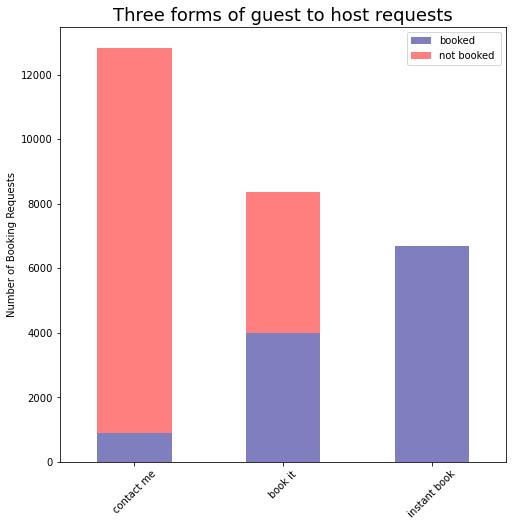

In [151]:
booked = [911, 3993, 6693]
no_booked = [11917, 4383, 0]
index = ['contact me', 'book it', 'instant book']
df = pd.DataFrame({'booked': booked,
                   'not booked ': no_booked}, index=index)
# ax.tick_params(labelrotation=70)
# ax.set_xlabel("")
# ax.set_title(col.replace('_', ' ').title())
# ax.xlabel(rotation=45)

# _ = ax.legend(loc='best')
# fig, ax = plt.subplots(figsize=(12,12))
ax = df.plot.bar(stacked=True,color=['#000080', '#FF0000'], alpha = 0.5, figsize = (8,8))
ax.set_xticklabels(index, rotation = 45)
ax.set_title('Three forms of guest to host requests', fontsize = 18)
ax.set_ylabel('Number of Booking Requests')
plt.savefig('booking_types.png')

In [120]:
contact_me_df_nobook

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,6,0.0,contact_me,past_booker,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,0,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,0,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,0,2016-06-11,2016-06-17,1.0,14,1478.0,contact_me,past_booker,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26
7,968d1d0e-8ace-4e9b-b806-7a4ae3dafbd5,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-03-21 22:32:01,2016-03-21 22:39:02.0,2016-03-21 22:40:26.0,0,2016-03-25,2016-03-27,2.0,3,113.0,contact_me,past_booker,Private room,Vidigal,49.0,968d1d0e-8ace-4e9b-b806-7a4ae3dafbd5,ES,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27970,6b5ae684-b4ca-4a71-9304-b73d2d0be506,83861e28-ddc3-451b-a230-b20761238e1a,1044406a-0ed0-4980-b0d8-de01cd6bddf0,2016-06-27 17:28:30,NaN,NaN,0,2016-08-12,2016-08-16,2.0,1,321.0,contact_me,new,Shared room,-unknown-,0.0,6b5ae684-b4ca-4a71-9304-b73d2d0be506,BR,0
27971,f8d0bbd7-cd6c-4790-adc6-4866196c8f7c,131376ad-5a29-418d-8a2b-2fa85220351b,7b24adac-db11-4166-8a9b-ab479557d467,2016-01-23 17:13:32,2016-01-24 02:05:06.0,NaN,0,2016-02-06,2016-02-10,3.0,2,235.0,contact_me,new,Entire home/apt,-unknown-,0.0,f8d0bbd7-cd6c-4790-adc6-4866196c8f7c,BR,0
27973,fba4fb6b-21c2-4e3c-8537-f96923c1b030,966dd82d-8e18-4c1e-87df-bf7337d5dfd6,3c9a9045-6309-4fe6-8ac3-5d67fe200d0e,2016-02-26 06:55:53,2016-02-26 11:27:57.0,2016-02-26 11:27:57.0,0,2016-03-19,2016-03-29,1.0,3,235.0,contact_me,past_booker,Entire home/apt,Ipanema,6.0,fba4fb6b-21c2-4e3c-8537-f96923c1b030,US,0
27975,093c954f-3664-4061-8d34-dbabccacec2d,c8a72e96-90c2-4712-a70a-9045b6aaaac4,e8eeca2e-94d2-41bd-8f46-cebe760df6de,2016-05-28 18:22:19,2016-05-29 02:08:14.0,NaN,0,2016-08-01,2016-08-31,5.0,4,89.0,contact_me,past_booker,Entire home/apt,Barra da Tijuca,0.0,093c954f-3664-4061-8d34-dbabccacec2d,CL,5


In [121]:
pd.to_datetime(contact_me_df_nobook['ts_interaction_first'],infer_datetime_format=True)

1       2016-05-16 01:44:04
2       2016-02-16 22:14:01
3       2016-01-27 23:33:38
4       2016-05-23 12:37:44
7       2016-03-21 22:32:01
                ...        
27970   2016-06-27 17:28:30
27971   2016-01-23 17:13:32
27973   2016-02-26 06:55:53
27975   2016-05-28 18:22:19
27978   2016-04-25 22:11:39
Name: ts_interaction_first, Length: 11980, dtype: datetime64[ns]

(0.0, 10.0)

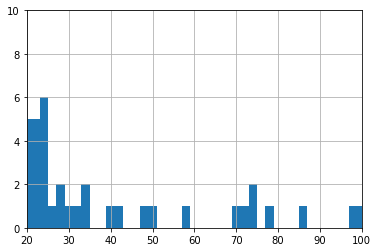

In [130]:
contact_me_df_nobook.id_host_anon.value_counts().hist(bins=50)
plt.xlim(20, 100)
plt.ylim(0, 10)

<AxesSubplot:>

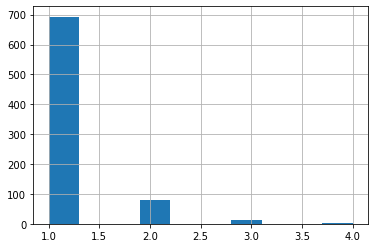

In [126]:
contact_me_df_book.id_host_anon.value_counts().hist()

<AxesSubplot:>

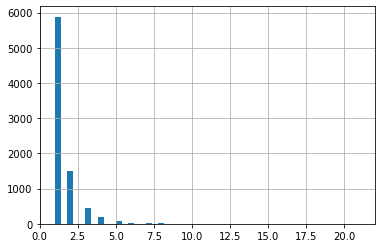

In [131]:
contact_me_df_nobook.id_listing_anon.value_counts().hist(bins=50)


<AxesSubplot:>

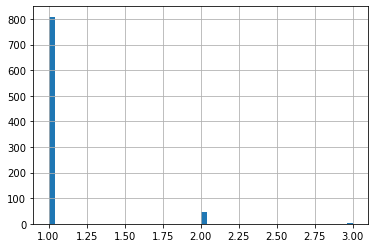

In [132]:
contact_me_df_book.id_listing_anon.value_counts().hist(bins=50)

<AxesSubplot:>

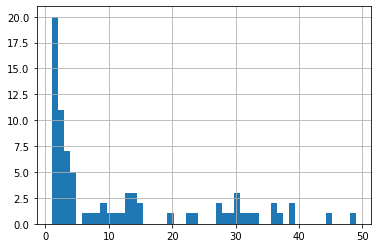

In [133]:
contact_me_df_book.m_interactions.value_counts().hist(bins=50)

<AxesSubplot:>

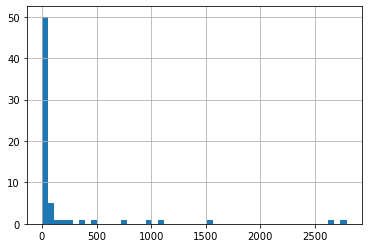

In [139]:
contact_me_df_nobook.m_interactions.value_counts().hist(bins=50)
# plt.xlim(0, 50)
# plt.ylim(0, 50)